In [1]:
# Libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import seaborn as sns

# Register converters to plot datetime axis
pd.plotting.register_matplotlib_converters()

# Setup matplotlib plotting
%matplotlib inline

In [2]:
# Load dataset
ds = pd.read_csv('data/ready.csv', parse_dates=['datetime'])
# Sort dataset
ds.sort_values(by='datetime', ascending=True, inplace=True)
# Show dataset
ds.head()

,datetime,AEP,DAYTON,DOM,DUQ
110328,2006-01-01 00:00:00,14565.0,1769.0,9649.0,1493.0
110327,2006-01-01 01:00:00,14287.0,1697.0,9258.0,1255.0
110326,2006-01-01 02:00:00,13932.0,1635.0,8987.0,1338.0
110325,2006-01-01 03:00:00,13713.0,1584.0,8781.0,1276.0
110324,2006-01-01 04:00:00,13656.0,1553.0,8680.0,1251.0


In [3]:
# Add year, month, day (of the week) and hour, separately
ds['year'] = ds.datetime.dt.year
ds['month'] = ds.datetime.dt.month
ds['day'] = ds.datetime.dt.dayofweek
ds['hour'] = ds.datetime.dt.hour

# Check dataset
ds.head()

,datetime,AEP,DAYTON,DOM,DUQ,year,month,day,hour
110328,2006-01-01 00:00:00,14565.0,1769.0,9649.0,1493.0,2006,1,6,0
110327,2006-01-01 01:00:00,14287.0,1697.0,9258.0,1255.0,2006,1,6,1
110326,2006-01-01 02:00:00,13932.0,1635.0,8987.0,1338.0,2006,1,6,2
110325,2006-01-01 03:00:00,13713.0,1584.0,8781.0,1276.0,2006,1,6,3
110324,2006-01-01 04:00:00,13656.0,1553.0,8680.0,1251.0,2006,1,6,4


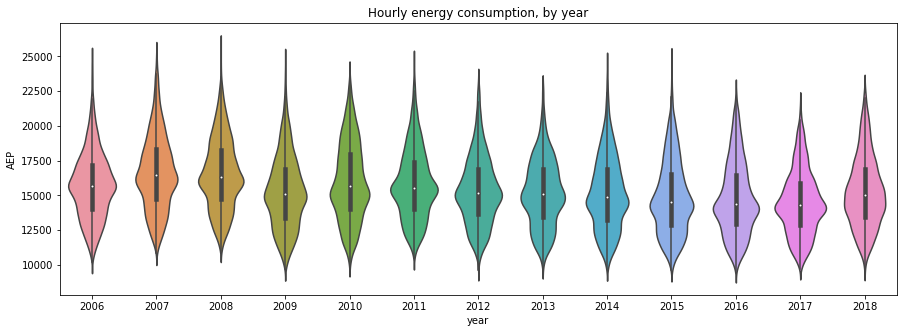

In [4]:
# Hourly energy consumption, by year

# Make plot
fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.set_title('Hourly energy consumption, by year')
_ = sns.violinplot(data=ds, x='year',y='AEP', ax=ax)
_ = plt.show()

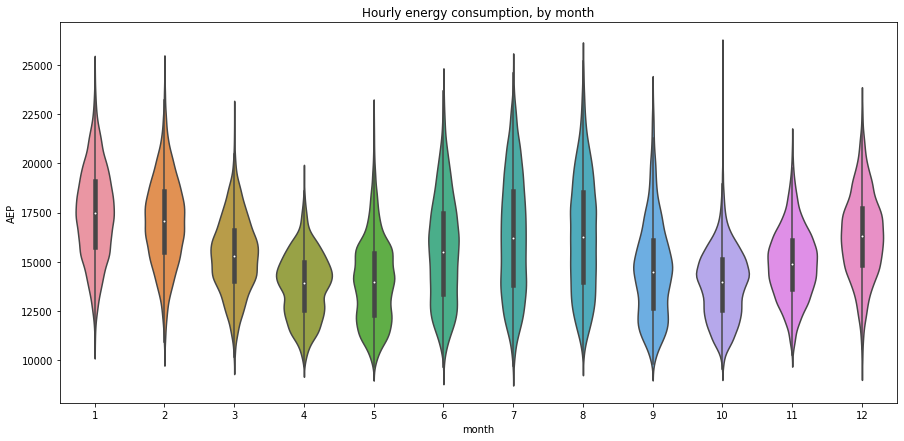

In [5]:
# Hourly energy consumption, by month of the year

# Make plot
fig, ax = plt.subplots(figsize=(15, 7))
_ = ax.set_title('Hourly energy consumption, by month')
_ = sns.violinplot(data=ds, x='month',y='AEP', ax=ax)
_ = plt.savefig('images/aep_by_month.png')
_ = plt.show()

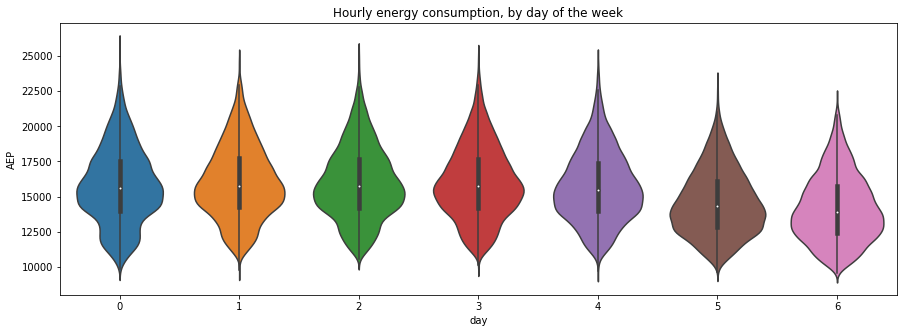

In [6]:
# Hourly energy consumption, by day of the week

# Make plot
fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.set_title('Hourly energy consumption, by day of the week')
_ = sns.violinplot(data=ds, x='day',y='AEP', ax=ax)
_ = plt.show()

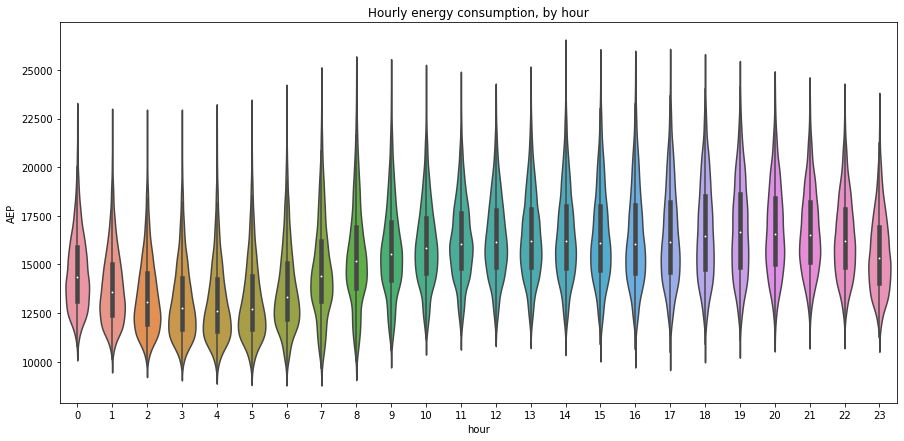

In [7]:
# Hourly energy consumption, by hour of the day

# Make plot
fig, ax = plt.subplots(figsize=(15, 7))
_ = ax.set_title('Hourly energy consumption, by hour')
_ = sns.violinplot(data=ds, x='hour',y='AEP', ax=ax)
_ = plt.savefig('images/aep_by_hour.png')
_ = plt.show()